In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

Read the csv into dataframe

In [4]:
Dataset = r"amazon_alexa.csv"

df = pd.read_csv(Dataset)
df.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


Data Analysis

In [5]:
df.describe()

,sentiment
count,3150.000000
mean,0.918413
std,0.273778
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
print(df.dtypes)

reviews      object
sentiment     int64
dtype: object


In [7]:
df.groupby('sentiment').describe()

reviews                
            count unique top freq
sentiment                        
0             257    207       19
1            2893   2095       60

Checking for null values

In [8]:
df.isna().sum()

reviews      0
sentiment    0
dtype: int64

Preprocessing the reviews (Converting to lowercase, Vectorization, Stemming, Removal of stopword and punctuation)

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', df['reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ha5hkat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorization using count vectorizer

In [10]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=df['sentiment']

In [15]:
cv.vocabulary_

{'love': 762,
 'echo': 428,
 'sometim': 1232,
 'play': 960,
 'game': 559,
 'answer': 63,
 'question': 1032,
 'correctli': 311,
 'alexa': 42,
 'say': 1134,
 'got': 581,
 'wrong': 1487,
 'like': 740,
 'abl': 1,
 'turn': 1372,
 'light': 738,
 'away': 104,
 'home': 626,
 'lot': 759,
 'fun': 553,
 'thing': 1327,
 'yr': 1497,
 'old': 889,
 'learn': 729,
 'control': 301,
 'nice': 853,
 'sound': 1241,
 'music': 828,
 'well': 1454,
 'receiv': 1061,
 'gift': 569,
 'need': 838,
 'anoth': 62,
 'bluetooth': 149,
 'someth': 1231,
 'easili': 427,
 'access': 7,
 'found': 541,
 'smart': 1213,
 'speaker': 1249,
 'wait': 1428,
 'see': 1151,
 'els': 438,
 'without': 1473,
 'cannot': 207,
 'use': 1401,
 'mani': 775,
 'featur': 506,
 'ipad': 689,
 'great': 590,
 'alarm': 38,
 'almost': 46,
 'deaf': 344,
 'hear': 613,
 'bedroom': 123,
 'live': 748,
 'room': 1113,
 'reason': 1058,
 'enough': 448,
 'keep': 702,
 'ask': 85,
 'random': 1043,
 'respons': 1098,
 'seem': 1152,
 'smartbon': 1214,
 'polit': 972,
 'ye

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: sentiment, Length: 3150, dtype: int64

Splitting data into training and test data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y_train

2859    1
793     1
2875    1
2034    1
493     1
       ..
763     1
835     1
1653    1
2607    1
2732    1
Name: sentiment, Length: 2520, dtype: int64

Multinomial Naive Bayes Classification

              precision    recall  f1-score   support

           0       0.73      0.44      0.55        54
           1       0.95      0.98      0.97       576

    accuracy                           0.94       630
   macro avg       0.84      0.71      0.76       630
weighted avg       0.93      0.94      0.93       630



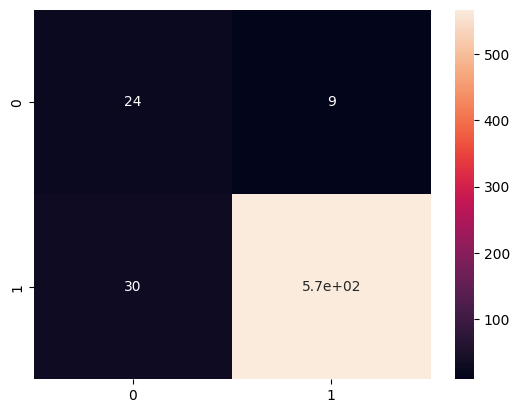

In [14]:
from sklearn.naive_bayes import MultinomialNB 
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

nb_pred = NB_classifier.predict(X_test)

cm = confusion_matrix(nb_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, nb_pred))

For Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.37      0.52        54
           1       0.94      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.91      0.68      0.74       630
weighted avg       0.94      0.94      0.93       630



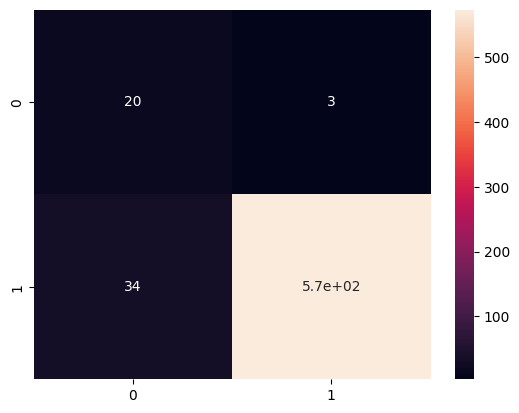

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

cm = confusion_matrix(lr_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, lr_pred))

For KNN Classification

              precision    recall  f1-score   support

           0       0.44      0.07      0.13        54
           1       0.92      0.99      0.95       576

    accuracy                           0.91       630
   macro avg       0.68      0.53      0.54       630
weighted avg       0.88      0.91      0.88       630



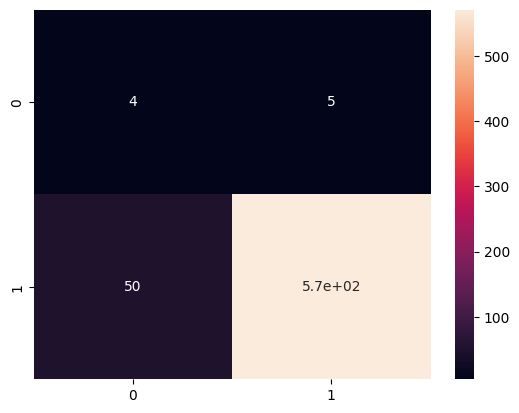

In [16]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(knn_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, knn_pred))

Multinomial Naive Bayes Classifier has the highest accuracy.